# Investment Analysis Assignment
#####                                                                                                                                                                            Submitted By: Koustav Chakraborty

### Project Brief:<br>
You work for Spark Funds, an asset management company. Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

Minor constraints:

1. It wants to invest between 5 to 15 million USD per round of investment

2. It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in

Compony Investment Stratergy:<br>

Spark Funds wants to invest where most other investors are investing. This pattern is often observed among early stage startup investors.

Data Available for Analysis:

1. Company basic data (companies.txt)
2. Funding round details (rounds2.csv)
3. Sector Classification info (mapping.csv)

Bussiness Objective:<br>

The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.

Goal of the Data Analysis:<br>
1. Investment type analysis
2. Country analysis
3. Sector analysis

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Importing the required python liberaries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
# setting a seaborn style of my preference
sns.set_style("whitegrid")

<br>
Reading the input files given as companies.txt, rounds2.csv, mapping.csv 

In [3]:
companies = pd.read_csv("C:\\Users\\koustav\\Desktop\\companies.txt", sep="\t", encoding = "unicode_escape")
rounds2 = pd.read_csv("C:\\Users\\koustav\\Downloads\\rounds2.csv",encoding= 'unicode_escape')
mapping = pd.read_csv("C:\\Users\koustav\\Downloads\\mapping.csv", encoding = "unicode_escape")

In [4]:
companies.shape
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [5]:
rounds2.shape
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [6]:
mapping.shape
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.8+ KB


In [7]:
#Analysing the data
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [8]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,4/9/2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,1/1/2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,1/1/2010


In [9]:
#Analysing the data
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [10]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [11]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


We have observed from the data that the permalink column has some data entered in uppercase while some in lower case.
Converting the primary key permalink to lower case for further merging of data

In [12]:
rounds2["company_permalink"] = rounds2["company_permalink"].str.lower()
companies["permalink"] = companies["permalink"].str.lower()

#### Table 1.1: Understand the Data Set 
    
1. How many unique companies are present in rounds2?

2. How many unique companies are present in companies?

3. In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.

4. Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N

5. Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame.How many observations are present in master_frame?

In [13]:
# Count of unique companies in round2 data
uniqc_rounds2=len(rounds2["company_permalink"].unique())
uniqc_rounds2

66370

#### Answers to the questions:
Question 1. How many unique companies are present in rounds2? <br>
Answer: 66370

In [14]:
# Count of unique companies in compaines file
uniqc_companies=len(companies.permalink.unique())
uniqc_companies

66368

#### Answers to the questions:
    Question 2. How many unique companies are present in companies file? <br>
    Answer: 66368

In [15]:
## Cleaning the name column, assigning the name of the company to the NaN cell, as there is only one and we can get the name from its permalink.

companies.loc[companies['permalink']=='/organization/tell-it-in',['name']]=' '.join(companies[companies['permalink']=='/organization/tell-it-in']['permalink'].str.split('/').tolist()[0][2].split('-'))

#### Answers to the questions:
    Question 3. In the companies data frame, which column can be used as the  unique key for each company?
              Write the name of the column? <br>
    Answer: permalink



#### There is one row with Name as null in the companies dataframe.
 Also, checked that the permalink is unique ID. But it seems that for the duplicate company names in the name column, the     permalink has been manipulated as it could not be duplicate.
#### Hence it seems that company name should be unique.

In [16]:
companies.loc[~rounds2.company_permalink.isin(companies.permalink)]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
29597,/organization/jimmy-fairly,Jimmy Fairly,http://www.jimmyfairly.com/,Active Lifestyle|Eyewear|Internet|Online Shopping,operating,FRA,A8,Paris,Paris,NaN
31863,/organization/lecere,Lecere,http://www.lecere.com,Software,closed,USA,OR,"Portland, Oregon",Portland,NaN
45176,/organization/printivo,Printivo,http://www.printivo.com,Business Services|E-Commerce|Printing,operating,NGA,5,Lagos,Lagos,20-12-2013
58473,/organization/tok3n,Tok3n,http://www.tok3n.com/,Enterprise Security|Security|Web Development,closed,MEX,NaN,NaN,NaN,NaN


#### Answers to the questions:
    Question 4. Are there any companies in the rounds2 file which are not present in companies? <br>
    Answer: Yes

Merging the two data frames so that all  variables (columns) in the companies frame are added to the rounds2 data frame for furthur analysis also naming the merged frame master_frame.

In [17]:
master_frame=pd.merge(rounds2,companies,how="left",left_on="company_permalink",right_on="permalink")

In [18]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
permalink                  114942 non-null object
name                       114942 non-null object
homepage_url               108810 non-null object
category_list              111535 non-null object
status                     114942 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94422 non-null object
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


In [19]:
master_frame.shape

(114949, 16)

#### Answers to the questions:
    Question5. Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame.
    Name the merged frame master_frame.
    How many observations are present in master_frame ?
    
    Answer: 
    There are 114949 rows, 16 columns.

In [20]:
## Creating a backup dataframe to calculate the percent of data removed from the dataframe
master_frame_bkp=master_frame.copy()

In [21]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,4/9/2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,4/9/2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,1/1/2007


### Checkpoint 1: Data Cleaning

In [22]:
# summing up the missing values count (column-wise)
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      7
name                           7
homepage_url                6139
category_list               3414
status                         7
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20527
dtype: int64

In [23]:
# check how many rows have all missing values
master_frame.isnull().all(axis=1).sum()

0

In [24]:
# missing values per column expressed as % of total number of values
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.01
name                        0.01
homepage_url                5.34
category_list               2.97
status                      0.01
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.86
dtype: float64

'raised_amount_usd' is a required column for analysis. Blank or null values in this field can either be deleted or imputed statistically.<br>
Here, choosing to remove these values for analysis as it accounts for 17% of data.

In [25]:
master_frame['raised_amount_usd'].isnull().sum()

19990

In [26]:
master_frame=master_frame[~master_frame.raised_amount_usd.isnull()]

In [27]:
master_frame['raised_amount_usd'].isnull().sum()

0

In [28]:
master_frame.shape

(94959, 16)

In [29]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         70.34
funded_at                   0.00
raised_amount_usd           0.00
permalink                   0.00
name                        0.00
homepage_url                4.56
category_list               1.10
status                      0.00
country_code                6.16
state_code                  8.01
region                      7.42
city                        7.42
founded_at                 16.81
dtype: float64

Now, if we notice further the missing data columns of 'funding_round_code', 'founded_at', 'homepage_url' which are 17.4%,17.9% and 5.34% of data are not required for this analysis. Hense, droping these columns.<br>
On the other hand the columns,    country_code and     category_list are needed for the analysis. Therefore removing rows with null or empty value in these columns.

In [30]:
master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)
master_frame = master_frame.drop('homepage_url', axis=1)

In [31]:
master_frame=master_frame[~master_frame.country_code.isnull()]

In [32]:
master_frame=master_frame[~master_frame.category_list.isnull()]

In [33]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
category_list              0.00
status                     0.00
country_code               0.00
state_code                 1.96
region                     1.34
city                       1.33
dtype: float64

Leaving the other null values. These are a very low percentage and are not a part of this analysis. We can remove such records but we decide to leave as they will not impact the analysis parameters.

In [34]:
master_frame.shape

(88529, 13)

In [35]:
# fraction of rows lost
len(master_frame.index)/114949

0.7701589400516751

In [36]:
master_frame['category_list'].describe()

count             88529
unique            21317
top       Biotechnology
freq               7621
Name: category_list, dtype: object

In [37]:
master_frame['raised_amount_usd'].describe()

count    8.852900e+04
mean     1.047385e+07
std      1.118118e+08
min      0.000000e+00
25%      3.705180e+05
50%      1.800000e+06
75%      7.100000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

### Checkpoint 2: Funding Type Analysis

Identify which investment type is the most suitable for Spark Funds
As specified, Spark Funds wants to choose one of the four investment types (seed,angel,venture,private_equity) for each potential investment they will make.

The funding types such as seed, venture, angel, etc. depend on the type of the company (startup, corporate, etc.), its stage (early stage startup, funded startup, etc.), the amount of funding (a few million USD to a billion USD), and so on. For example, seed, angel and venture are three common stages of startup funding.

Seed/angel funding refer to early stage startups whereas venture funding occurs after seed or angel stage/s and involves a relatively higher amount of investment.
Private equity type investments are associated with much larger companies and involve much higher investments than venture type. Startups which have grown in scale may also receive private equity funding. This means that if a company has reached the venture stage, it would have already passed through the angel or seed stage/s.
 


In [38]:
master_frame.funding_round_type.value_counts()

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

In [39]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0,/organization/01games-technology,01Games Technology,Games,operating,HKG,NaN,Hong Kong,Hong Kong
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver


In [40]:
master_frame['funding_round_type'].unique()

array(['venture', 'seed', 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

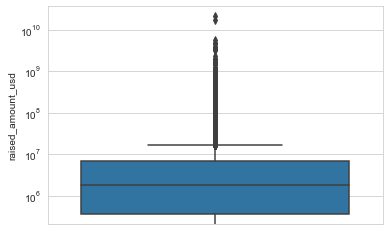

In [42]:
sns.boxplot(y=master_frame['raised_amount_usd'])
plt.yscale('log')
plt.show()

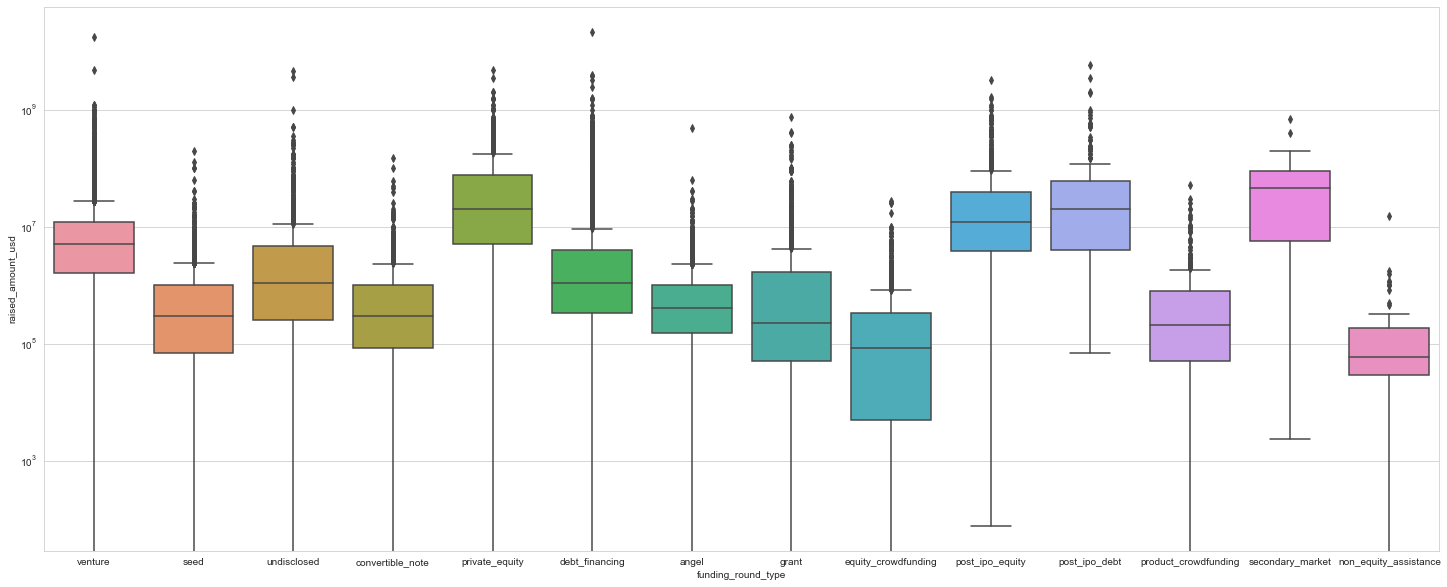

In [43]:
# boxplot of a variable across various funding categories
plt.figure(figsize=(25, 10))
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.yscale('log')
plt.show()

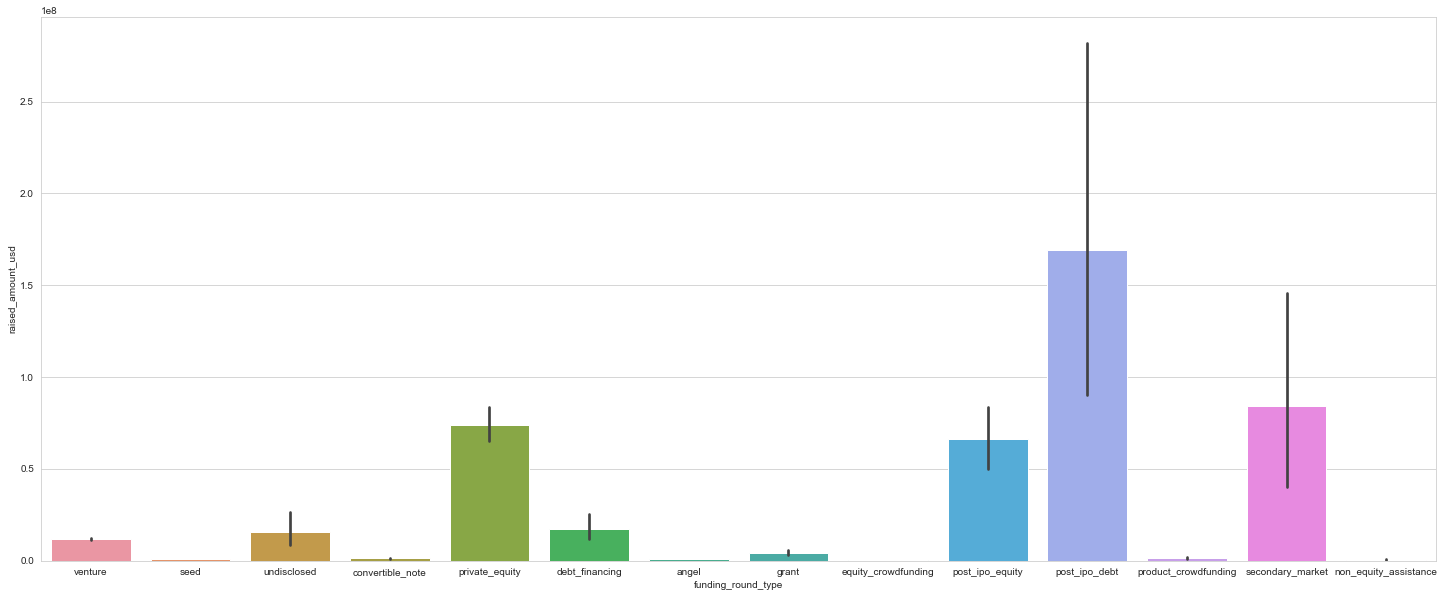

In [44]:
# bar plot with default statistic=mean
plt.figure(figsize=(25, 10))
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.show()

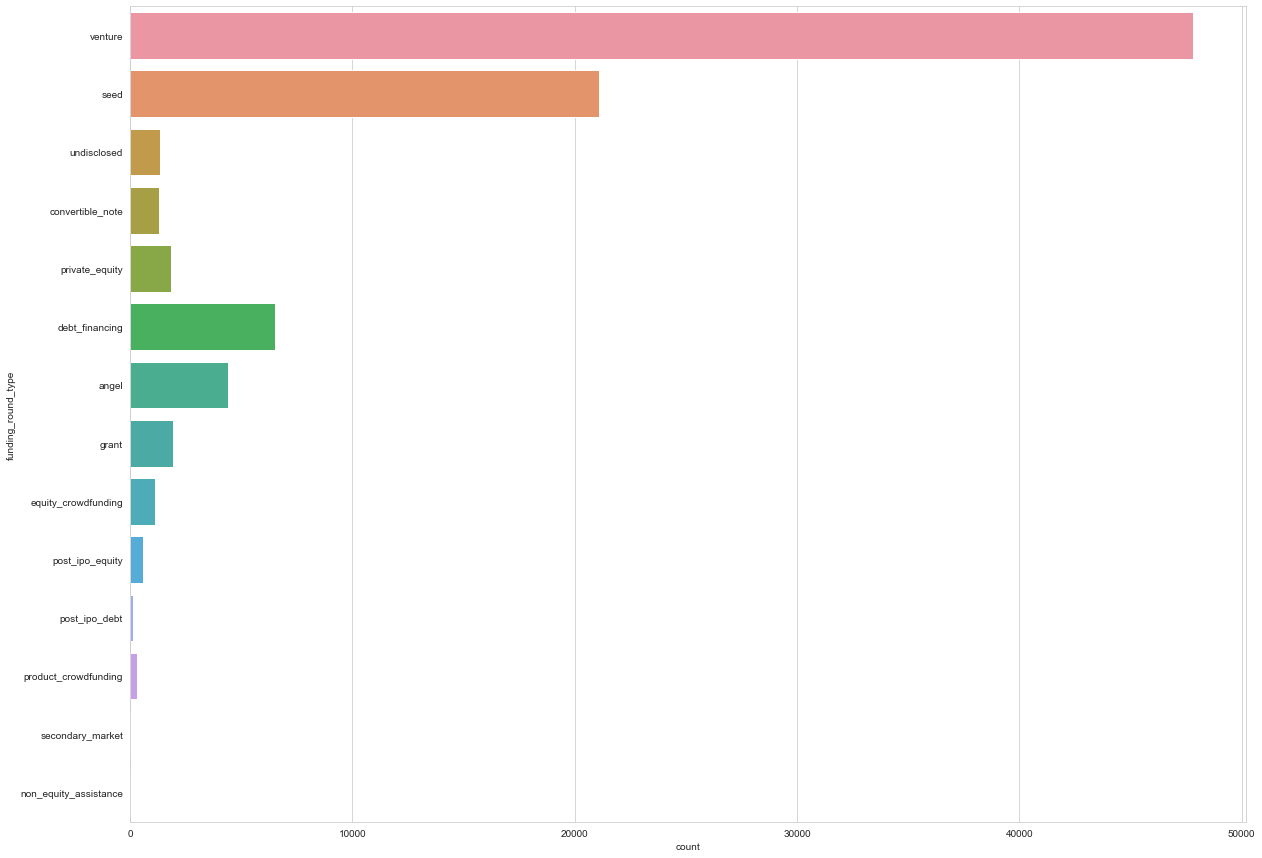

In [45]:
# Plotting count across a categorical variable 
plt.figure(figsize=(20, 15))
sns.countplot(y="funding_round_type", data=master_frame)
plt.show()

There are total 14 unique investment type available to choose from. As Spark fund is willing to invest between 5M to 15M per round. Therefore,filtering rows with funding_round_type in seed,angel,venture,private_equity only. 

In [46]:
master_frame=master_frame[master_frame['funding_round_type'].isin(['seed','angel','venture','private_equity'])]

In [47]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver


In [48]:
# We can choose aggregate functions mean to get the average funding raised for each funding types
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)
# averages

funding_round_type
private_equity    7.393849e+07
venture           1.172422e+07
angel             9.715739e+05
seed              7.477937e+05
Name: raised_amount_usd, dtype: float64

In [49]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)
# medians

funding_round_type
private_equity    20000000.0
venture            5000000.0
angel               414906.0
seed                300000.0
Name: raised_amount_usd, dtype: float64

#### Answers to Questions:
    1. Average funding amount of venture type
        11,724,220 Dollars
        
    2. Average funding amount of angel type
       971,573.90 Dollars
        
    3. Average funding amount of seed type
        747,793.70 Dollars
 
    4. Average funding amount of private equity type
        73,938,490  Dollars

In [50]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().between(5000000,15000000,inclusive=True)

funding_round_type
angel             False
private_equity    False
seed              False
venture            True
Name: raised_amount_usd, dtype: bool

#### Answers to Questions:
5.Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, which investment type is the most suitable for it? <br>

Clearly, Venture type of investment is the ideal investment type for Spark Funds. It satisfy the investment constrain of investment of 5M to 15M USD.Now, according to Spark Fund's investment stratagy which is to invest between 5 to 15 million USD per investment round, we can clearly see that Venture funding type is the most appropriate to invest in.


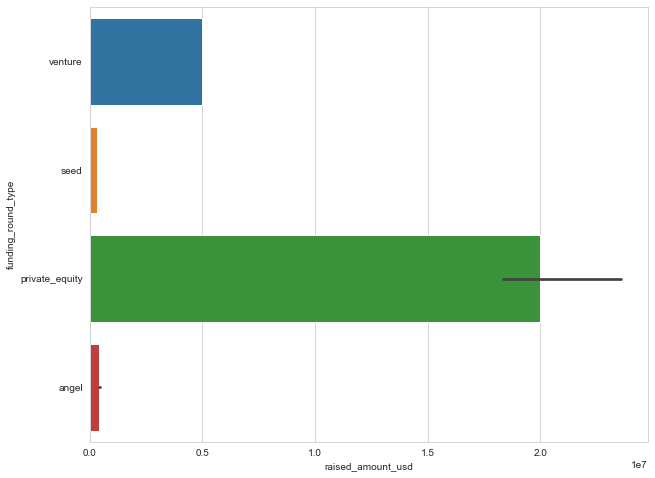

In [51]:
# Plotting categorical variable across the y-axis
plt.figure(figsize=(10, 8))
sns.barplot(x='raised_amount_usd', y="funding_round_type", data=master_frame, estimator=np.median)
plt.show()

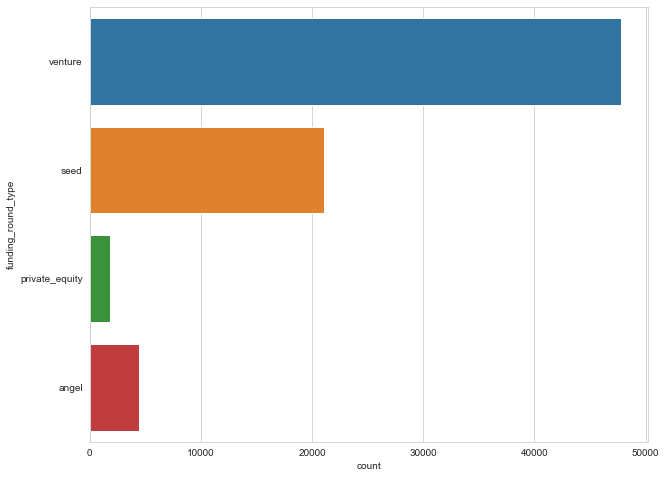

In [52]:
# Plotting count across a categorical variable 
plt.figure(figsize=(10, 8))
sns.countplot(y="funding_round_type", data=master_frame)
plt.show()

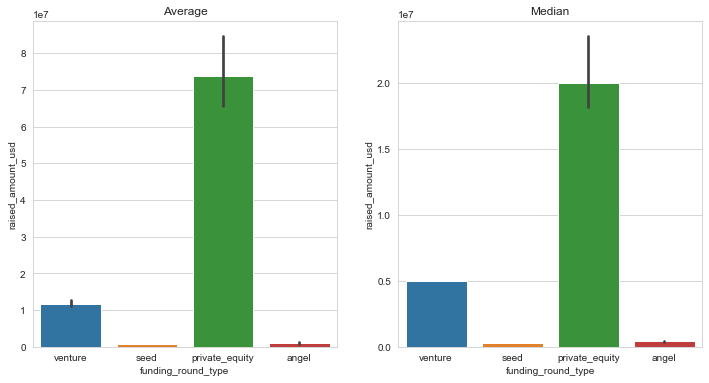

In [53]:
# subplots for mean and median respectively

# increase figure size 
plt.figure(figsize=(12, 6))

# subplot 1: statistic=mean
plt.subplot(1, 2, 1)
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.title("Average")

# subplot 2: statistic=median
plt.subplot(1, 2, 2)
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame, estimator=np.median)
plt.title("Median")

plt.show()

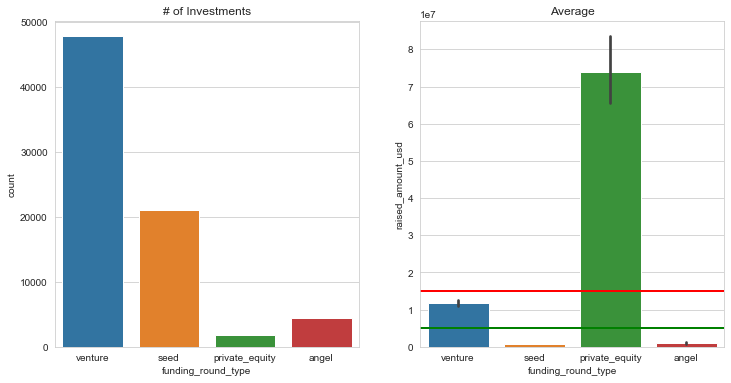

In [54]:
# Plots showing No of Investments and mean across 4 Funding type
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x="funding_round_type", data=master_frame)
plt.title("# of Investments")
plt.subplot(1, 2, 2)
sns.barplot(y='raised_amount_usd', x="funding_round_type", data=master_frame, estimator=np.mean)
plt.title("Average")
plt.axhline(y=5000000, linewidth=2, color = 'green')
plt.axhline(y=15000000, linewidth=2, color = 'red')
plt.show()

### Checkpoint 3: Country Analysis

Further filtering the data so that it only contains the data for the investment type i.e venture

In [55]:
venture_df = master_frame[master_frame["funding_round_type"]=="venture"]

In [56]:
venture_df.shape

(47809, 13)

In [57]:
venture_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47809 entries, 0 to 114941
Data columns (total 13 columns):
company_permalink          47809 non-null object
funding_round_permalink    47809 non-null object
funding_round_type         47809 non-null object
funded_at                  47809 non-null object
raised_amount_usd          47809 non-null float64
permalink                  47809 non-null object
name                       47809 non-null object
category_list              47809 non-null object
status                     47809 non-null object
country_code               47809 non-null object
state_code                 47076 non-null object
region                     47218 non-null object
city                       47218 non-null object
dtypes: float64(1), object(12)
memory usage: 5.1+ MB


In [58]:
venture_df.head()


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View


Finding top 9 countries which have received the highest total funding. This can be done by looking at the aggregation of the raised amount in each country.

In [59]:
venture_by_country = venture_df.groupby('country_code')
venture_by_country['raised_amount_usd'].sum().sort_values(ascending=False).head(9)

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
Name: raised_amount_usd, dtype: float64

Filtering the data with these top 9 countries only.

In [60]:
top9 = venture_df[venture_df['country_code'].isin(["USA","CHN","GBR","IND","CAN","FRA","ISR","DEU","JPN"])]

In [61]:
top9.shape

(44118, 13)

Removing/Cleaning the rows with no category information in the category_list column for further analysis.

In [62]:
top9=top9[~top9.category_list.isnull()]


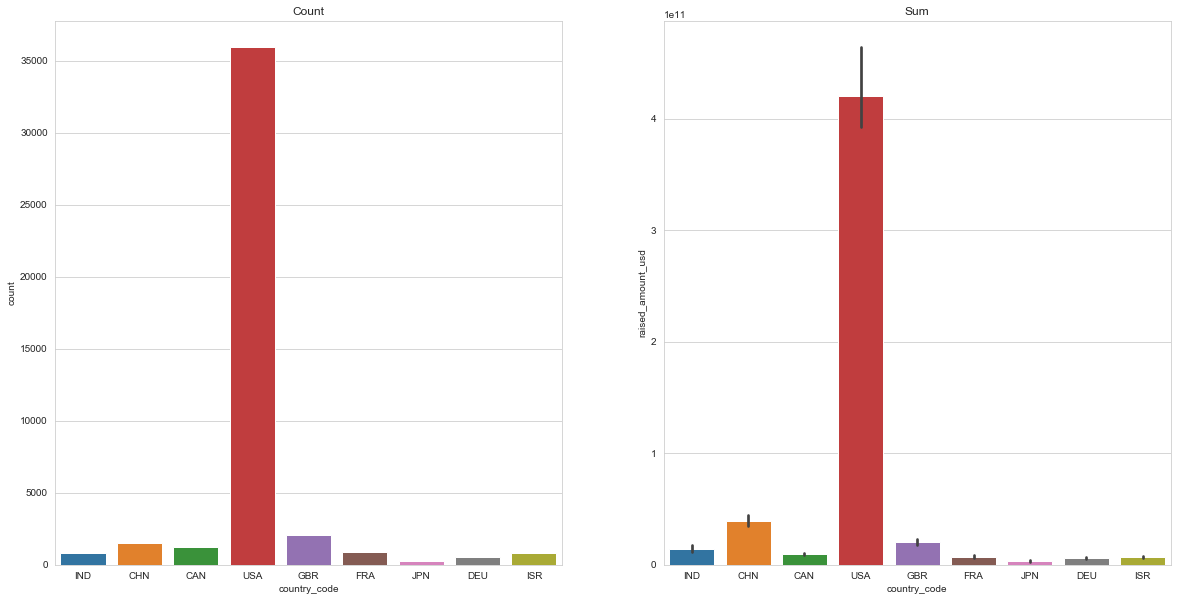

In [63]:
# Plotting sum across top 9 country_code 

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(x="country_code", data=top9)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(x="country_code", y="raised_amount_usd", data=top9, estimator=sum)
plt.title("Sum")
plt.show()

#### TABLE 3.1
    For this referred attached pdf for list of english speaking countries
    
#### Answers to the questions:
    1. Top English speaking country = USA
    2. Second English speaking country = GBR (Great Britain)
    3. Third English speaking country = IND 

In [64]:
# Let's now create a new data frame with only these 3 countires data for furthur sector wise analysis
top3_english = top9[top9['country_code'].isin(['USA', 'GBR', 'IND'])]
top3_english.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA    4.200680e+11
GBR    2.007281e+10
IND    1.426151e+10
Name: raised_amount_usd, dtype: float64

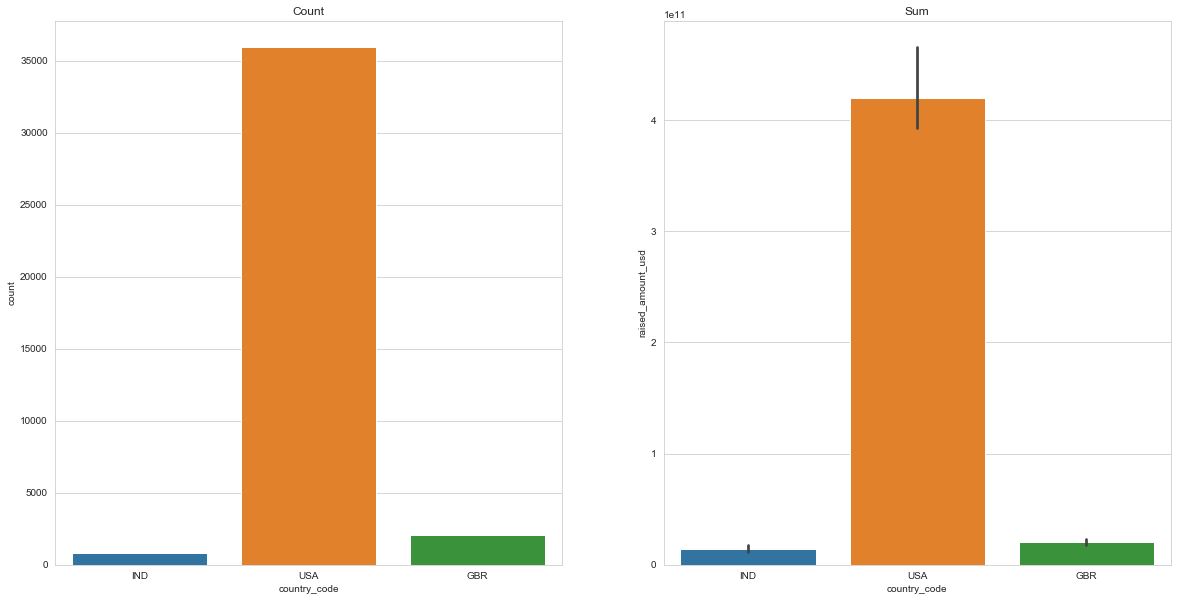

In [65]:
# Plotting sum across top 3 english official language country_code 
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(x="country_code", data=top3_english)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(x="country_code", y="raised_amount_usd", data=top3_english, estimator=sum)
plt.title("Sum")
plt.show()

### Checkpoint 4: Sector Analysis 1

#### Steps to follow
1. Extract the primary sector in separate column `primary_sector` of each category list from the `category_list` column by selecting 1st value before '|' symbol
2. Convert values of `primary_sector` to UPPER so it can be joined with sector_mapping

For further analysis and mapping, removing the null rows from the mapping dataframe.


In [66]:
mapping=mapping[~mapping.category_list.isnull()]
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


For some companies, the category list is a list of multiple sub-sectors separated by a pipe (vertical bar |). For example, one of the companies’ category_list is Application Platforms|Real Time|Social Network Media.<br>
<br>
 

After discussing with the CEO and come up with the business rule that the first string before the vertical bar will be considered the primary sector. In the example above, ‘Application Platforms’ will be considered the primary sector.<br>
Creating a new column primary_sector to store this information in the Dataframe.

Writing a function get Primary Sector to return the primary sector from the category_list column.

In [67]:
#top9['primary_sector'] = list(map(getPrimarySector,top9['category_list']))
top9['primary_sector']=top9['category_list'].astype(str).apply(lambda x: x.split('|')[0])

In [68]:
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,Media
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,Curated Web
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,Biotechnology
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics


In [69]:
top9.shape

(44118, 14)

Writing a Custom Function to correct the category_list column of the mapping file.

In [70]:
def correctMapping0(category):
## Function to correct the mapping data.It can be observed from the data 
##that at many places in the category_class column the 'na' is misprinded as '0'
## Eg. 'Analysis' is present as 'A0lysis'
    if '0' in category:
        if category.startswith("0"):    # Handle 0notechnology case with capital Na
            return category[:category.find('0')]+'Na'+category[category.find('0')+1:]
        elif category.endswith("0"):    # ignores the 2.0 case with 0 at the end of the string
            return category
        else:
            return category[:category.find('0')]+'na'+category[category.find('0')+1:]
    else:
        return category

In [71]:
# calling the custom function to correct the category_list column in the mapping.
mapping['category_list']=list(map(correctMapping0,mapping['category_list']))

Mapping the category_list in the top9 dataframe to the main_sector in the mapping file. Before merging these two dataframe, creating a new column main_sector in mapping dataframe to get the main sector name of each category.

In [72]:
m=pd.melt(mapping, id_vars=['category_list'], var_name=['main_sector'])
m=m[m.value==1]
m=m.drop('value',axis=1)
m.shape

(687, 2)

In [73]:
top9=pd.merge(top9,m,how="left",left_on="primary_sector",right_on="category_list")

In [74]:
top9=top9.drop('category_list_y',axis=1)

In [75]:
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,state_code,region,city,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,Media,Entertainment
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,Curated Web,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,Biotechnology,Cleantech / Semiconductors
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,"Social, Finance, Analytics, Advertising"


In [76]:
top9['main_sector'].head()

0                              Entertainment
1                 News, Search and Messaging
2                 Cleantech / Semiconductors
3    Social, Finance, Analytics, Advertising
4    Social, Finance, Analytics, Advertising
Name: main_sector, dtype: object

Checking for null in the main_sector column of the merged data frame.

In [77]:
len(top9[top9['main_sector'].isnull()])

12

There are only 12 rows with missing main_sector values. Hence, removing such rows.

In [78]:
top9=top9[~(top9['main_sector'].isnull())]

In [79]:
len(top9[top9['main_sector'].isnull()])

0

In [80]:
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,state_code,region,city,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,Media,Entertainment
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,Curated Web,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,Biotechnology,Cleantech / Semiconductors
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,"Social, Finance, Analytics, Advertising"


### Checkpoint 5: Sector Analysis 2

<br>Creating three separate data frames D1, D2 and D3 for each of the top three countries (USA, GBR, IND) containing the observations of funding type venture falling within the 5-15 million USD range.

##### Sector Analysis - USA

In [81]:
D1=top9[top9['country_code']=='USA']

In [82]:
D1 = D1[(D1['raised_amount_usd'] >= 5000000) & (D1['raised_amount_usd'] <= 15000000)]

Total amount raised in USA

In [83]:
D1.raised_amount_usd.sum()

107757097294.0

In [84]:
D1.raised_amount_usd.count()

12063

In [85]:
D1.shape

(12063, 15)

Finding the top sectors with the highest number of investments in USA.

In [86]:
D1_by_sector=D1.groupby('main_sector')

In [87]:
D1_by_sector['raised_amount_usd'].count().sort_values(ascending = False).head()


main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Name: raised_amount_usd, dtype: int64

In [88]:
D1_by_sector['raised_amount_usd'].sum().sort_values(ascending = False).head()

main_sector
Others                                     2.632101e+10
Social, Finance, Analytics, Advertising    2.380738e+10
Cleantech / Semiconductors                 2.163343e+10
News, Search and Messaging                 1.397157e+10
Health                                     8.211859e+09
Name: raised_amount_usd, dtype: float64

Finding the highest invested company among the 1st Top sectors of the country.

In [89]:
D1[D1['main_sector']=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  permalink                        
Others       /organization/virtustream            64300000.0
             /organization/capella                54968051.0
             /organization/airtight-networks      54201907.0
             /organization/decarta                52100000.0
             /organization/black-duck-software    51000000.0
Name: raised_amount_usd, dtype: float64

Finding the highest invested company among the 2nd Top sectors of the country.

In [90]:
D1[D1['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                              permalink                
Social, Finance, Analytics, Advertising  /organization/shotspotter    67933006.0
                                         /organization/demandbase     63000000.0
                                         /organization/intacct        61800000.0
                                         /organization/netbase        60600000.0
                                         /organization/lotame         59700000.0
Name: raised_amount_usd, dtype: float64

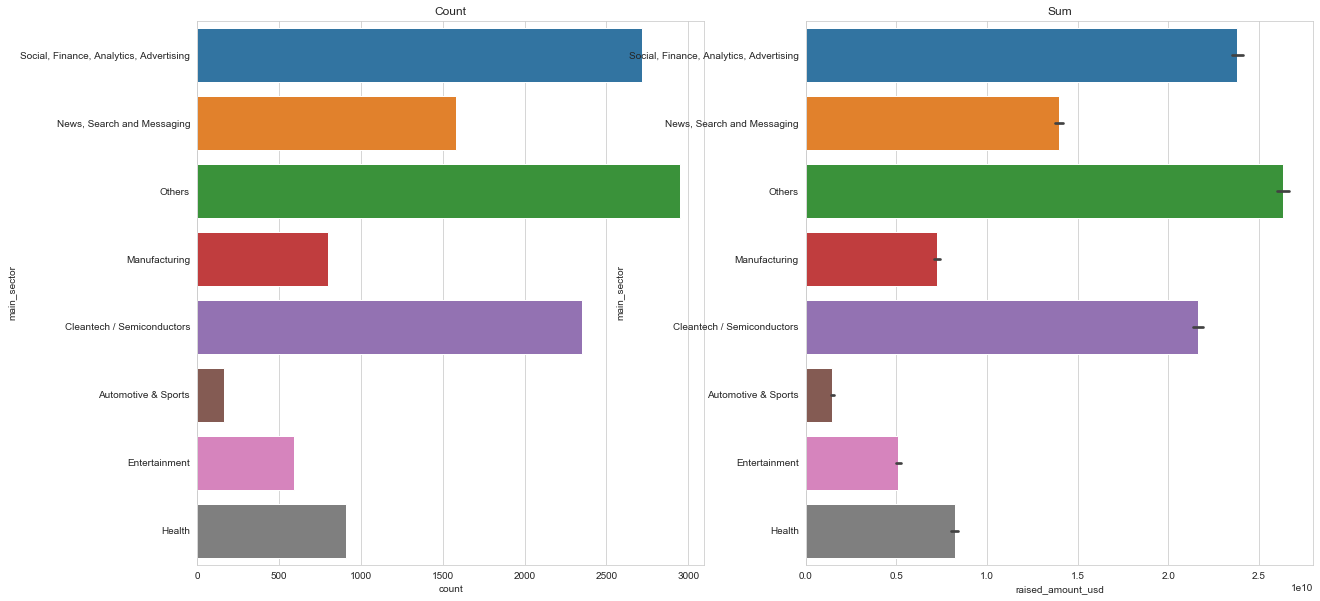

In [91]:
# Invests in all sectors across USA
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(y="main_sector", data=D1)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(y="main_sector", x="raised_amount_usd", data=D1, estimator=sum)
plt.title("Sum")
plt.show()

##### Sector Analysis - GBR (United Kingdom)

Creating Data frame D2 for country GBR

In [92]:
D2=top9[top9['country_code']=='GBR']
D2 = D2[(D2['raised_amount_usd'] >= 5000000) & (D2['raised_amount_usd'] <= 15000000)]
D2_by_sector=D2.groupby('main_sector')

Finding the top sectors with the highest number of investments in GBR.

In [93]:
D2_by_sector['raised_amount_usd'].count().sort_values(ascending = False).head()

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Name: raised_amount_usd, dtype: int64

In [94]:
D2_by_sector['raised_amount_usd'].sum().sort_values(ascending = False)

main_sector
Others                                     1.283624e+09
Cleantech / Semiconductors                 1.163990e+09
Social, Finance, Analytics, Advertising    1.089404e+09
News, Search and Messaging                 6.157462e+08
Entertainment                              4.827847e+08
Manufacturing                              3.619403e+08
Health                                     2.145375e+08
Automotive & Sports                        1.670516e+08
Name: raised_amount_usd, dtype: float64

Total amount raised in GBR

In [95]:
D2.raised_amount_usd.sum()

5379078691.0

In [96]:
D2.raised_amount_usd.count()

621

In [97]:
D2.shape

(621, 15)

Finding the highest invested company among the 1st Top sectors of the country.

In [98]:
D2[D2['main_sector']=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  permalink                            
Others       /organization/electric-cloud             37000000.0
             /organization/sensage                    36250000.0
             /organization/enigmatic                  32500000.0
             /organization/silverrail-technologies    29000000.0
             /organization/opencloud                  27972766.0
Name: raised_amount_usd, dtype: float64

Finding the highest invested company among the 2nd Top sectors of the country.

In [99]:
D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                              permalink                          
Social, Finance, Analytics, Advertising  /organization/celltick-technologies    37500000.0
                                         /organization/mythings                 34000000.0
                                         /organization/zopa                     32900000.0
                                         /organization/imagini                  28550000.0
                                         /organization/marketinvoice            25553007.0
Name: raised_amount_usd, dtype: float64

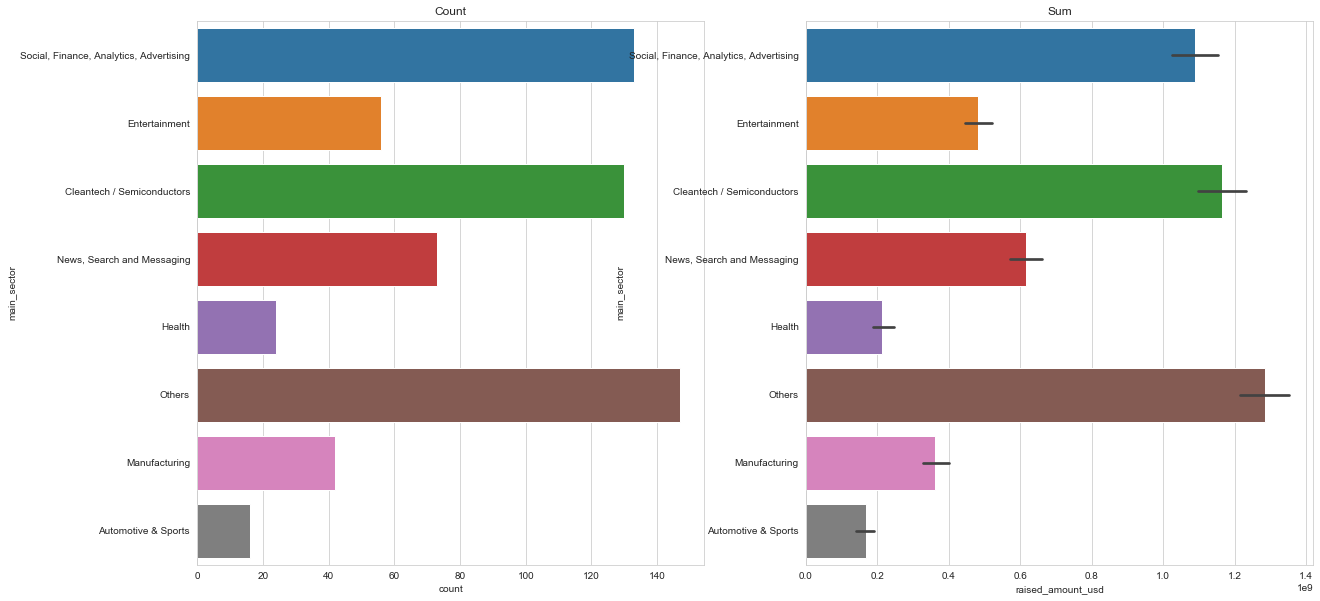

In [100]:
# Invests in all sectors across GBR
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(y="main_sector", data=D2)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(y="main_sector", x="raised_amount_usd", data=D2, estimator=sum)
plt.title("Sum")
plt.show()

##### Sector Analysis -  India

Creating Data frame D3 for country IND

In [101]:
D3=top9[top9['country_code']=='IND']
D3 = D3[(D3['raised_amount_usd'] >= 5000000) & (D3['raised_amount_usd'] <= 15000000)]
D3_by_sector=D3.groupby('main_sector')

Finding the top sectors with the highest number of investments in IND.

In [102]:
D3_by_sector['raised_amount_usd'].count().sort_values(ascending = False)

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64

In [103]:
D3_by_sector['raised_amount_usd'].sum().sort_values(ascending = False)

main_sector
Others                                     1.013410e+09
Social, Finance, Analytics, Advertising    5.505496e+08
News, Search and Messaging                 4.338345e+08
Entertainment                              2.808300e+08
Manufacturing                              2.009000e+08
Health                                     1.677400e+08
Cleantech / Semiconductors                 1.653800e+08
Automotive & Sports                        1.369000e+08
Name: raised_amount_usd, dtype: float64

In [104]:
D3.shape

(328, 15)

Total amount raised in IND

In [105]:
D3.raised_amount_usd.sum()

2949543602.0

In [106]:
D3.raised_amount_usd.count()

328

Finding the highest invested company among the 1st Top sectors of the country.

In [107]:
D3[D3['main_sector']=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  permalink                     
Others       /organization/firstcry-com        39000000.0
             /organization/myntra              38000000.0
             /organization/commonfloor         32900000.0
             /organization/pepperfry-com       28000000.0
             /organization/itzcash-card-ltd    25000000.0
Name: raised_amount_usd, dtype: float64

Finding the highest invested company among the 2nd Top sectors of the country.

In [108]:
D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                              permalink                               
Social, Finance, Analytics, Advertising  /organization/manthan-systems               50700000.0
                                         /organization/komli-media                   28000000.0
                                         /organization/shopclues-com                 25000000.0
                                         /organization/intarvo                       21900000.0
                                         /organization/grameen-financial-services    21556050.0
Name: raised_amount_usd, dtype: float64

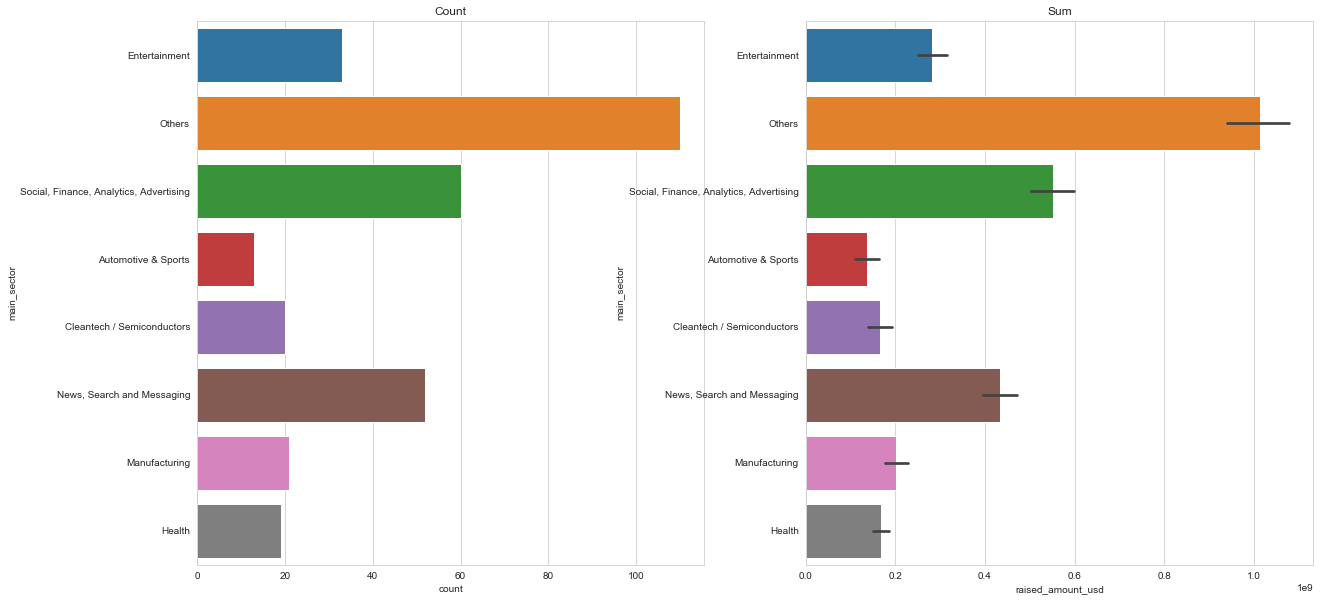

In [109]:
# Invests in all sectors across IND
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(y="main_sector", data=D3)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(y="main_sector", x="raised_amount_usd", data=D3, estimator=sum)
plt.title("Sum")
plt.show()

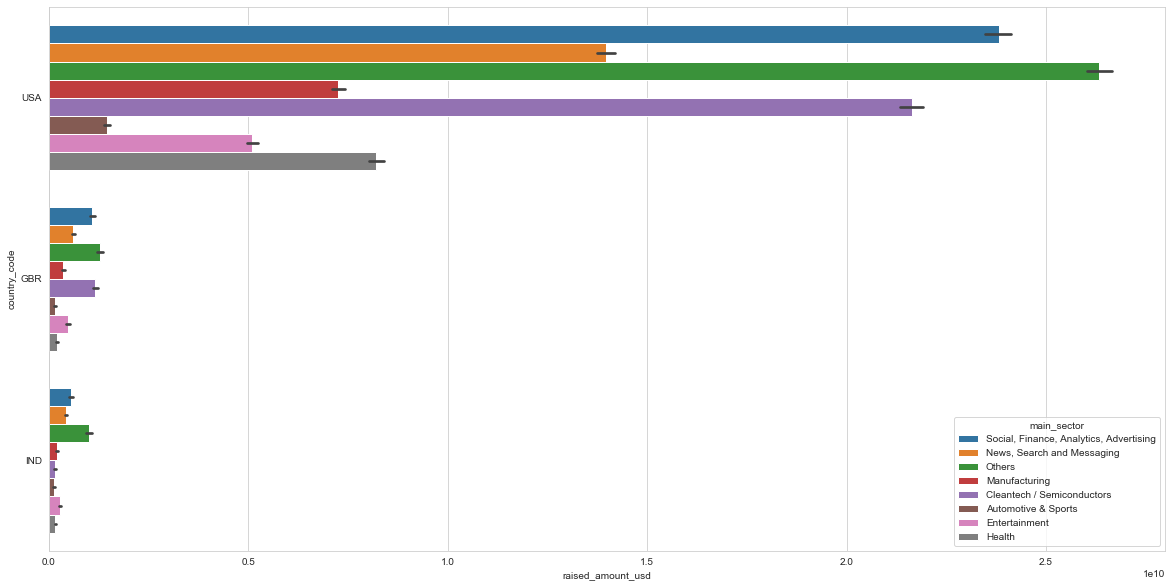

In [110]:
# Invests in all sectors across top 3 countries 
frames = [D1, D2, D3]
result = pd.concat(frames)
plt.figure(figsize=(20, 10))
sns.barplot(y='country_code', x='raised_amount_usd', hue="main_sector", data=result, estimator=np.sum)
plt.show()

### Checkpoint 6: Plots

#### Funding Type Analysis Plot 1

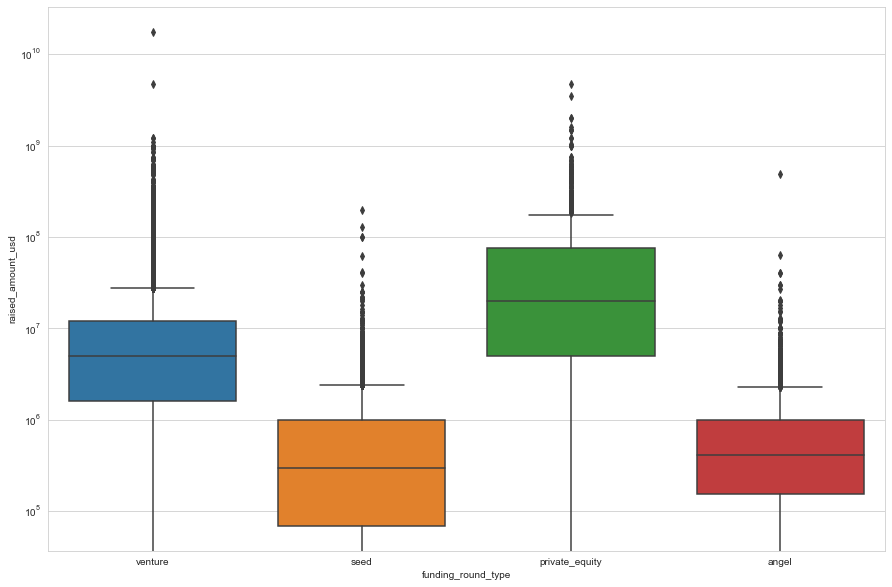

In [111]:
# boxplot of a variable across various funding categories
plt.figure(figsize=(15, 10))
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.yscale('log')
plt.show()

#### Funding Type Analysis Plot 2

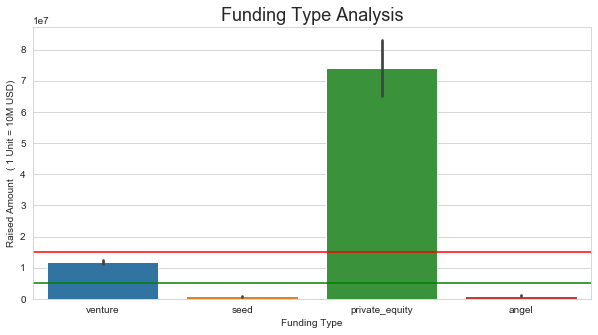

In [112]:
# bar plot with default statistic=mean
plt.figure(figsize=(10,5))
g=sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
#g.set_ylim(0, 20000000)
#g.set_yscale('log')
g.set(xlabel='Funding Type', ylabel='Raised Amount   ( 1 Unit = 10M USD)')
g.set_title('Funding Type Analysis',fontsize =18)

plt.axhline(5000000, color='green')
plt.axhline(15000000, color='red')


plt.show()

In [113]:
plot_frame1=master_frame.loc[(master_frame['funding_round_type'] == 'angel') | 
                             (master_frame['funding_round_type'] == 'venture') | 
                             (master_frame['funding_round_type'] == 'seed') | 
                             (master_frame['funding_round_type'] == 'private_equity'), :].groupby('funding_round_type')['raised_amount_usd'].sum()
plot_frame1.head(n=10)

funding_round_type
angel             4.274925e+09
private_equity    1.345680e+11
seed              1.577471e+10
venture           5.605234e+11
Name: raised_amount_usd, dtype: float64

#### Funding Type Analysis Plot 3

([<matplotlib.patches.Wedge at 0x201e5cff710>,
 [Text(0.6139021244577484, 0.9127563648566158, 'angle'),
  Text(-0.019630985494036867, 1.099824815326756, 'venture'),
  Text(-0.6902159067773438, 0.856505692935855, 'seed'),
  Text(0.07514354631268176, -1.0974303838729609, 'private_equity')],
 [Text(0.33485570424968086, 0.49786710810360857, '0.60%'),
  Text(-0.010707810269474653, 0.5999044447236851, '18.82%'),
  Text(-0.37648140369673294, 0.4671849234195572, '2.21%'),
  Text(0.04098738889782641, -0.5985983912034331, '78.38%')])

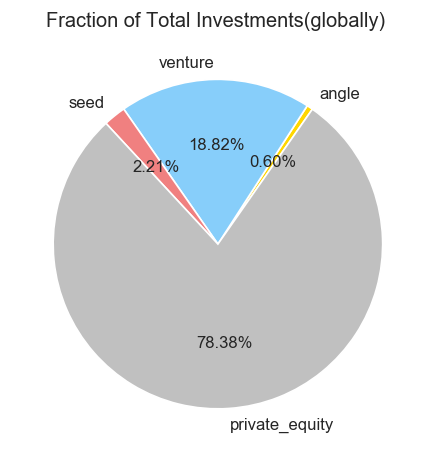

In [114]:
# Fraction of Total Investments(globally)
plt.figure(figsize=[10.0,10.0],dpi=120,edgecolor='c',frameon=True)
plt.subplot(221)
plt.title('Fraction of Total Investments(globally) ',pad=7)
# Data to plot
labels = 'angle', 'venture', 'seed', 'private_equity'
colors = ['gold', 'lightskyblue', 'lightcoral', 'silver']
# Plot
plt.pie(plot_frame1, labels=labels, colors=colors,autopct='%1.2f%%', startangle=55)


#### Country Analysis Plot 

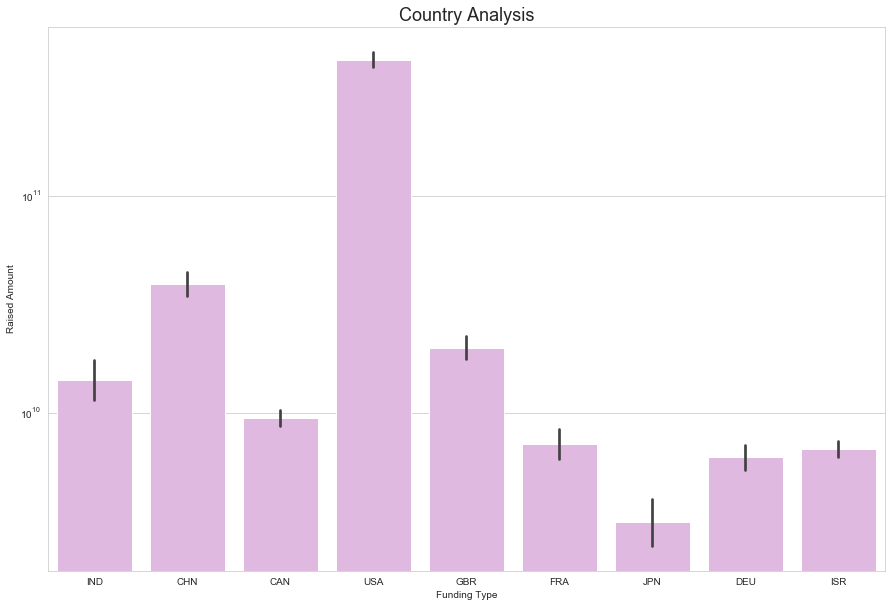

In [115]:
# bar plot with default statistic=mean
plt.figure(figsize=(15,10))
c=sns.barplot(x='country_code', y='raised_amount_usd', data=top9, estimator=np.sum,color=(0.9, 0.7, 0.9, 0.6))
#c.set_ylim(0, 100000000000)
c.set_yscale('log')
c.set(xlabel='Funding Type', ylabel='Raised Amount')
c.set_title('Country Analysis',fontsize =18)
plt.show()

A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type i.e venture)

For this plot creating a master dataframe with all the data for the top 3 sectors of the top 3 countries.

In [116]:
master_D=D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]

In [117]:
master_D.shape

(8014, 15)

In [118]:
master_D=master_D.append(D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])], ignore_index=True)

In [119]:
master_D.shape

(8424, 15)

In [120]:
master_D=master_D.append(D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])], ignore_index=True)

In [121]:
master_D.shape

(8646, 15)

#### Sector Analysis Plot 

Using the master_D dataframe to plot the sector wise investment count of the top 3 sectors of the top3 countries.

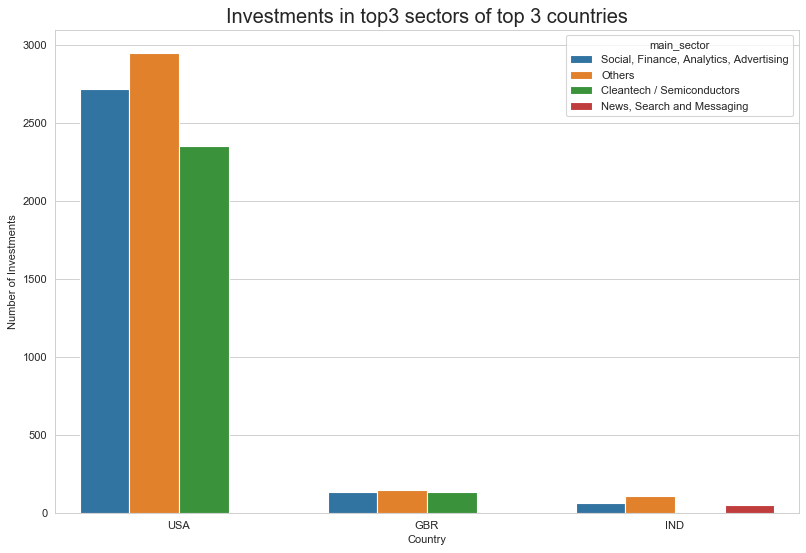

In [122]:
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
s=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=master_D,estimator=lambda x: len(x))
s.set(xlabel='Country', ylabel='Number of Investments')
s.set_title('Investments in top3 sectors of top 3 countries',fontsize =18)
plt.show()